## Datetime - epoch is from Unix time 0 (midnight 1/1/1970)

## PS2 - What day of the week was 1/1/1970

In [4]:
myArray = np.array([1,2,3,4,5,6,7])
mySeries = pd.Series(myArray)
mySeries.index = pd.date_range(start='1/1/1970', periods=7)
mySeries.index.dayofweek

Int64Index([3, 4, 5, 6, 0, 1, 2], dtype='int64')

In [22]:
import calendar 
dayNumber = calendar.weekday(1970, 1, 1)  ## First approach
days =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] 
dayNumber
days[dayNumber]


'Thursday'

In [27]:
import datetime   ## Second
today = datetime.date(2021, 3, 9) #Today's date (It is a Tuesday, today! )
past_date = datetime.date(1970, 1, 1) #Jan 1 1970
days[(today - past_date).dayss%7 - 2 ]  # -1 because today is tuesday and another -1 becuase zero indexing. 

'Thursday'

## PS2 - UFO Data - Handling Time, Day of Week etc
### What day of the week has the most sightings?
### On the day with most sightings plot a histogram the time of day the sightings occured
### Do the same for the day with the 2nd most sightings
### For extra credit - Are there any deductions or patterns you see in the data? Justify with plots or data.

In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])
ufo


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [20]:
dates=ufo.Time.map(lambda t: t.date()).values
times=ufo.Time.map(lambda t: t.time()).values
unique_dates=ufo.Time.map(lambda t: t.date()).unique()

In [236]:
counts=[]
for date_unique in unique_dates:
    Q=0
    for date in dates:
        if date == date_unique:
            Q=Q+1
    counts.append(Q)
sorted_idx=np.argsort(counts);
max_date=unique_dates[sorted_idx[-1]]
dayNumber_max = calendar.weekday(max_date.year, max_date.month, max_date.day)
max2_date=unique_dates[sorted_idx[-2]]
dayNumber_max2 = calendar.weekday(max2_date.year, max2_date.month, max2_date.day) 

print('day with most sightings is:',max_date,' which is:',days[dayNumber_max])
print('day with second most sightings is:',max2_date,' which is:',days[dayNumber_max2])


day with most sightings is: 1999-11-16  which is: Tuesday
day with second most sightings is: 1997-03-13  which is: Thursday


Text(0.5, 1.0, 'times of the day for the day with most sightings ')

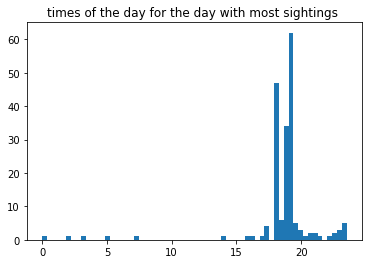

In [221]:
time_max=[];
for i in range(len(dates)):
    if dates[i]==max_date:
        time_max.append(times[i].hour+times[i].minute/60)
time_max2=[];
for i in range(len(dates)):
    if dates[i]==max2_date:
        time_max2.append(times[i].hour+times[i].minute/60)
plt.hist(time_max, bins='auto');
plt.title("times of the day for the day with most sightings ")

Text(0.5, 1.0, 'times of the day for the day with second most sightings ')

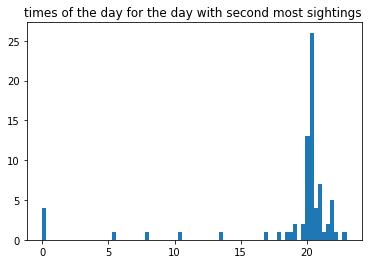

In [222]:
plt.hist(time_max2, bins='auto');
plt.title("times of the day for the day with second most sightings ")